In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = np.linspace(0,1,1000)

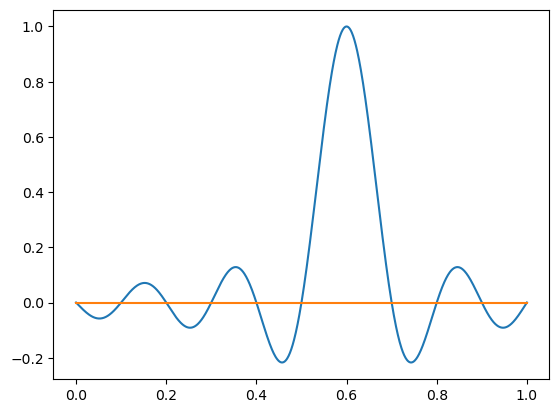

In [6]:
Dx = 0.1
d = 0.6
plt.plot(x,np.sin(np.pi*(x-d)/Dx)/(np.pi*(x-d)/Dx))
plt.plot(x,np.zeros(len(x)))

In [7]:
h = 10
Dx = 1/(h-1)
grid = np.linspace(0,1,h)
grid

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [8]:
x = np.linspace(0,1,100)
x_scaled = np.pi*(x[:,None] - grid[None,:])/Dx
x_scaled.shape
basis_values = np.sin(x_scaled)/x_scaled
basis_gradients = np.cos(x_scaled)/x_scaled - np.sin(x_scaled)/x_scaled**2

/tmp/ipykernel_2721329/348699932.py:4: RuntimeWarning: invalid value encountered in divide
  basis_values = np.sin(x_scaled)/x_scaled
/tmp/ipykernel_2721329/348699932.py:5: RuntimeWarning: divide by zero encountered in divide
  basis_gradients = np.cos(x_scaled)/x_scaled - np.sin(x_scaled)/x_scaled**2
/tmp/ipykernel_2721329/348699932.py:5: RuntimeWarning: invalid value encountered in divide
  basis_gradients = np.cos(x_scaled)/x_scaled - np.sin(x_scaled)/x_scaled**2


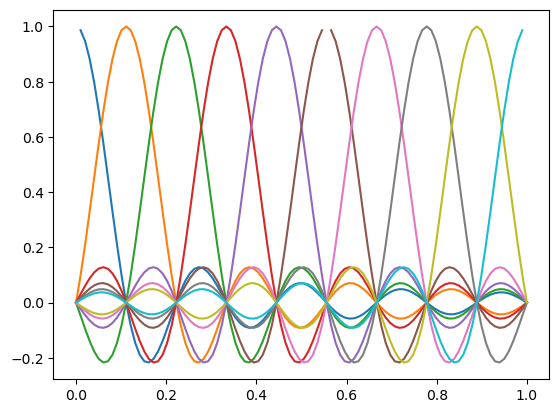

In [9]:
for i in range(h):
    plt.plot(x,basis_values[:,i])

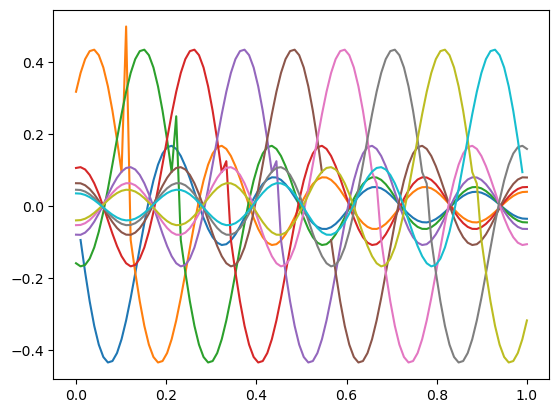

In [10]:
for i in range(h):
    plt.plot(x,basis_gradients[:,i])

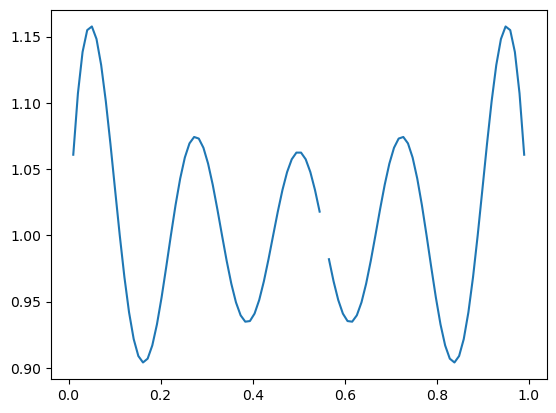

In [11]:
plt.plot(x,np.sum(basis_values, axis=-1))

In [12]:
class SincBasis1D:
    def __init__(self, h):
        self.h = h
        self.Dx = 1/(h-1)
        self.grid = np.linspace(0,1,self.h)
        self.tol = 1e-7

    def sinc(self, x):
        output = np.sin(x)/x
        output[np.abs(x)<self.tol] = 1
        return output
    
    def dsincdx(self, x):
        output = np.cos(x)/x - np.sin(x)/x**2
        output[np.abs(x)<self.tol] = 0
        return output
    
    def forward(self, x):
        basis_values = np.zeros((x.shape[0],self.h))
        for n in range(self.h):
            x_scaled = np.pi*(x - self.grid[n])/self.Dx
            basis_values[:, n] = self.sinc(x_scaled)
        return basis_values
    
    def grad(self, x):
        basis_gradients = np.zeros((x.shape[0],self.h))
        for n in range(self.h):
            x_scaled = np.pi*(x - self.grid[n])/self.Dx
            basis_gradients[:, n] = np.pi/self.Dx*self.dsincdx(x_scaled)
        return basis_gradients

    def plot_1d_basis(self):
        resolution = 1000
        x_values = np.linspace(0, 1, resolution)  # Adjusted range for x_values
        basis_matrix = self.forward(x_values)
        plt.figure(figsize=(8, 6))
        for i in range(self.h):
            plt.plot(x_values, basis_matrix[:,i], label=f'Basis {i}')
        plt.title(f'1D Basis Functions')
        plt.xlabel('x')
        plt.ylabel('Basis Values')
        plt.legend()
        plt.grid(True)
        # plt.savefig("BSpline1D.svg", bbox_inches='tight', transparent=True)
        plt.show()
        
    def plot_1d_basis_gradients(self):
        """
        Plot the gradients of the 1D B-spline basis functions for a specified dimension.

        Args:
        dim_idx (int): Index of the dimension for which to plot the basis function gradients.
        """
        resolution = 1000
        x_values = np.linspace(0, 1, resolution)  # Use full knot span for x_values
        basis_gradients_matrix = self.grad(x_values)
        plt.figure(figsize=(8, 6))
        for i in range(self.h):
            plt.plot(x_values, basis_gradients_matrix[:, i], label=f'Gradient {i}')
        plt.title(f'Gradients of 1D Basis Functions')
        plt.xlabel('x')
        plt.ylabel('Gradient Values')
        plt.legend()
        plt.grid(True)
        # plt.savefig("BSplinegrad1D.svg", bbox_inches='tight', transparent=True)
        plt.show()

In [27]:
sincbasis = SincBasis1D(h=10)

/tmp/ipykernel_2721329/1131639775.py:9: RuntimeWarning: invalid value encountered in divide
  output = np.sin(x)/x


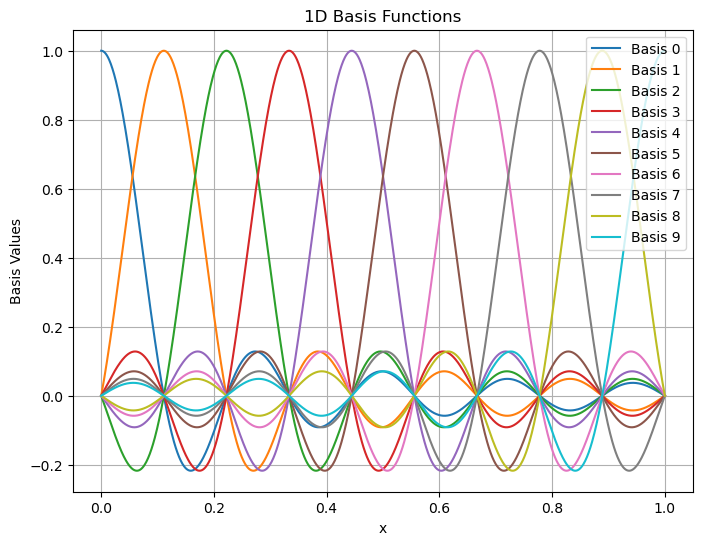

In [28]:
sincbasis.plot_1d_basis()

/tmp/ipykernel_2721329/1131639775.py:14: RuntimeWarning: divide by zero encountered in divide
  output = np.cos(x)/x - np.sin(x)/x**2
/tmp/ipykernel_2721329/1131639775.py:14: RuntimeWarning: invalid value encountered in divide
  output = np.cos(x)/x - np.sin(x)/x**2


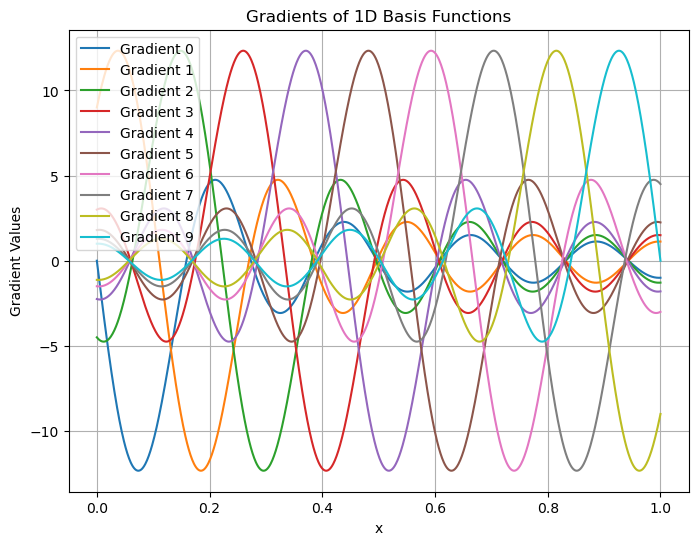

In [29]:
sincbasis.plot_1d_basis_gradients()

In [29]:
np.sin(0)/0

/tmp/ipykernel_1874398/2272500757.py:1: RuntimeWarning: invalid value encountered in double_scalars
  np.sin(0)/0


nan